<a href="https://colab.research.google.com/github/OzyMeister/ML-Minor/blob/main/ML_Exp4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings 
warnings.simplefilter('ignore')
import gc

# visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [3]:
# load data
file = '/content/FakeNewsNet.csv.zip' #https://www.kaggle.com/datasets/algord/fake-news
wanted_cols = ['title','real']
df = pd.read_csv(file, usecols=wanted_cols)

In [4]:
df

,title,real
0,Kandi Burruss Explodes Over Rape Accusation on...,1
1,People's Choice Awards 2018: The best red carp...,1
2,Sophia Bush Sends Sweet Birthday Message to 'O...,1
3,Colombian singer Maluma sparks rumours of inap...,1
4,Gossip Girl 10 Years Later: How Upper East Sid...,1
...,...,...
23191,Pippa Middleton wedding: In case you missed it...,1
23192,Zayn Malik & Gigi Hadid’s Shocking Split: Why ...,0
23193,Jessica Chastain Recalls the Moment Her Mother...,1
23194,"Tristan Thompson Feels ""Dumped"" After Khloé Ka...",0


In [5]:
# drop NULLs (if any) & reset index
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [6]:
# adding a new column [word count]
df['wcount'] = df['title'].apply(lambda x: len(x.split(' ')))

# view
print(f"Found {df.shape[0]} news...")

Found 23196 news...


In [7]:
df

,title,real,wcount
0,Kandi Burruss Explodes Over Rape Accusation on...,1,13
1,People's Choice Awards 2018: The best red carp...,1,9
2,Sophia Bush Sends Sweet Birthday Message to 'O...,1,15
3,Colombian singer Maluma sparks rumours of inap...,1,10
4,Gossip Girl 10 Years Later: How Upper East Sid...,1,17
...,...,...,...
23191,Pippa Middleton wedding: In case you missed it...,1,15
23192,Zayn Malik & Gigi Hadid’s Shocking Split: Why ...,0,16
23193,Jessica Chastain Recalls the Moment Her Mother...,1,17
23194,"Tristan Thompson Feels ""Dumped"" After Khloé Ka...",0,16


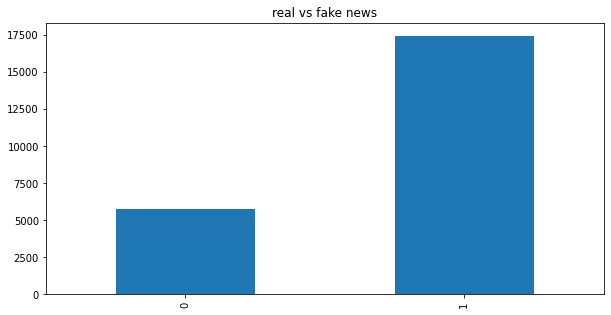

In [8]:
# basic EDA - count of fake & real
df['real'].value_counts().sort_index().plot(kind='bar', title = 'real vs fake news',figsize=(10,5))

In [9]:
# df['real'].value_counts()[0]

In [10]:
# df = df.sample(frac=1)
# # amount of fake classes 5755 rows.
# fraud_df = df.loc[df['real'] == 1][:5755]
# non_fraud_df = df.loc[df['real'] == 0]

# normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# # Shuffle dataframe rows
# df = normal_distributed_df.sample(frac=1, random_state=42)

# df.head()

In [11]:
# # basic EDA - count of fake & real
# df['real'].value_counts().sort_index().plot(kind='bar', title = 'real vs fake news',figsize=(10,5))

In [12]:
# feature engineering & training split
x = df['title'].values   # feature
y = df['real'].values    # target 

# train & validation split [80-20]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state= np.random.randint(10))

# view
print(f"Training records: {x_train.shape[0]} | Testing records: {x_test.shape[0]}")

Training records: 18556 | Testing records: 4640


In [13]:
# rus = RandomUnderSampler()
# rus_x_train, rus_y_train = rus.fit_resample(x_train, y_train)

# print('original dataset shape:', Counter(y_train))
# print('Resample dataset shape', Counter(rus_y_train))

In [14]:
df['title'].values[3]

'Colombian singer Maluma sparks rumours of inappropriate relationship with AUNT'

In [15]:
example = df['title'].values[50]

In [16]:
print(example)

Mama June Trash Talks Daughter Pumpkin's Fiance


In [17]:
# import nltk
# nltk.download('punkt') #tokenizer divides a text into a list of sentences by using an unsupervised algorithm
# nltk.download('averaged_perceptron_tagger') #used for tagging words with their parts of speech (POS)
# nltk.download('maxent_ne_chunker') #takes tokens and groups them in chunks of text
# nltk.download('words')

In [18]:
# tokens = nltk.word_tokenize(example)

In [19]:
# tagged = nltk.pos_tag(tokens)

PartOfSpeech values are abbrevbiations for the meaning they have 

for example : 

NNP is proper noun,singular

POS is possesive ending 

NN is noun, singular



In [20]:
# entities = nltk.chunk.ne_chunk(tagged) #takes tokens and groups them in chunks of text
# entities.pprint()

In [21]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
data_h= pd.DataFrame()
data_l=pd.DataFrame

In [23]:
data_h['text']=df['title'].astype(str)
data_h['real']=df['real']

In [24]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
#Every mail starts with 'Subject :' will remove this from each text 


data_h['text'] = data_h['text'].map(lambda text:re.sub('[^a-zA-Z0-9]+', ' ',text)).apply(lambda x: (x.lower()).split())
ps = PorterStemmer()
corpus=data_h['text'].apply(lambda text_list:' '.join(list(map(lambda word:ps.stem(word),(list(filter(lambda text:text not in set(stopwords.words('english')),text_list)))))))

# Creating the Bag of Words model

In [26]:
data_h

,text,real
0,"[kandi, burruss, explodes, over, rape, accusat...",1
1,"[people, s, choice, awards, 2018, the, best, r...",1
2,"[sophia, bush, sends, sweet, birthday, message...",1
3,"[colombian, singer, maluma, sparks, rumours, o...",1
4,"[gossip, girl, 10, years, later, how, upper, e...",1
...,...,...
23191,"[pippa, middleton, wedding, in, case, you, mis...",1
23192,"[zayn, malik, gigi, hadid, s, shocking, split,...",0
23193,"[jessica, chastain, recalls, the, moment, her,...",1
23194,"[tristan, thompson, feels, dumped, after, khlo...",0


In [27]:
df['title'].values[3]

'Colombian singer Maluma sparks rumours of inappropriate relationship with AUNT'

In [28]:
data_h['text'].values[3]

['colombian',
 'singer',
 'maluma',
 'sparks',
 'rumours',
 'of',
 'inappropriate',
 'relationship',
 'with',
 'aunt']

In [29]:
corpus_h = pd.DataFrame()
corpus_h['text']=corpus
corpus_h['real']=df['real']
corpus_h.head()

,text,real
0,kandi burruss explod rape accus real housew at...,1
1,peopl choic award 2018 best red carpet look,1
2,sophia bush send sweet birthday messag one tre...,1
3,colombian singer maluma spark rumour inappropr...,1
4,gossip girl 10 year later upper east sider sho...,1


In [30]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
dtm_h  = vec.fit_transform(corpus_h['text'])

In [31]:
print(f'No of terms in the document term matrix is {dtm_h.shape[1]}')

No of terms in the document term matrix is 12963


In [32]:
five_percent_vectorizer1 = CountVectorizer(min_df = 0.05)
five_percent_document_term_matrix1 = five_percent_vectorizer1.fit_transform(corpus_h['text'])

print(f'No of terms in the the one percent document term matrix is {five_percent_document_term_matrix1.shape[1]}')

No of terms in the the one percent document term matrix is 1


In [33]:
from numpy import count_nonzero
densemat=five_percent_document_term_matrix1.toarray()
sparsity = 1.0 - ( count_nonzero(densemat) / float(densemat.size) )
print('Sparsity of higher dimension matrix',sparsity)

Sparsity of higher dimension matrix 0.9473185031902052


In [34]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
#X_h = cv.fit_transform(dtm_l).toarray()
y_h = corpus_h['real'].values

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(five_percent_document_term_matrix1,y_h,random_state=1)

In [36]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)
predictions = naive_bayes.predict(X_test)

In [42]:
# from sklearn.model_selection import cross_val_score
# cross_val_score(naive_bayes, X_train, y_train)

array([0.75316092, 0.75316092, 0.75337741, 0.75337741, 0.75337741])

Text(91.68, 0.5, 'predicted label')

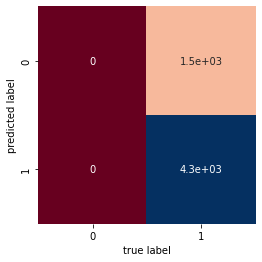

In [37]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')


In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print('For Higher dimension')
print('Accuracy score: ', accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions, target_names=target_names))

For Higher dimension
Accuracy score:  0.7477151232971202
              precision    recall  f1-score   support

     class 0       0.00      0.00      0.00      1463
     class 1       0.75      1.00      0.86      4336

    accuracy                           0.75      5799
   macro avg       0.37      0.50      0.43      5799
weighted avg       0.56      0.75      0.64      5799



In [43]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
model = LinearDiscriminantAnalysis()
model.fit(X_train.toarray(), y_train)
y_lda1=model.predict(X_test)

In [45]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
tn2, fp2, fn2, tp2 = confusion_matrix(y_test,y_lda1).ravel()

In [40]:
def Specificity(tn0,fp0,fn0,tp0):
  spec= tn0 / (tn0+fp0)
  return spec

def Sensitivity(tn0,fp0,fn1,tp0):
  sen=tp0/(tp0+fn1)
  return sen

def error(y_test0,pred):
   err= 1-accuracy_score(y_test0,pred)
   return err

In [41]:
print('For Naive Bayes')
print('Specificity is: ', Specificity(tn, fp, fn, tp))
print('Sensitivity is: ', Sensitivity(tn, fp, fn, tp))
print('Error is: ', error(y_test, predictions))

For Naive Bayes
Specificity is:  0.0
Sensitivity is:  1.0
Error is:  0.2522848767028798


In [46]:
print('For LDA - high dimension:')
print('Specificity is: ', Specificity(tn2, fp2, fn2, tp2))
print('Sensitivity is: ', Sensitivity(tn2, fp2, fn2, tp2))
print('Error is: ', error(y_test,y_lda1))

For LDA - high dimension:
Specificity is:  0.002734107997265892
Sensitivity is:  0.9974630996309963
Error is:  0.2534919813760993
